# EDA de los datos de Energy:

Estos [datos](https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population) fueron extraídos de la Administración de Energía de EE. UU. y se unieron para un análisis más sencillo. Es una colección de algunos factores importantes que influyen en las emisiones de C02, desde la producción y el consumo de cada tipo de fuente de energía principal para cada país y su índice de contaminación cada año. También incluye el PIB, la población, la intensidad energética per cápita (persona) y la intensidad energética por PIB (PIB por persona) de cada país. Todos los datos abarcan desde la década de 1980 hasta 2020.

### 1. Importar librerías:

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Abrir y Explorar Archivo:

In [8]:
df_energy = pd.read_csv('../Datasets/energy.csv')

df_energy.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


Contenido cantidad y tipo de datos:

In [47]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [9]:
df_energy.columns

Index(['Unnamed: 0', 'Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

### 3. Dicionario de Datos:

| Columna | Descripción |
|------|------------------|
| Country | País en cuestión |
| Energy_type | Tipo de fuente de energía. |
| Year | año en que se registraron los datos. |
| Energy_consumption| cantidad de consumo de la fuente de energía específica, medida (quad Btu) |
| Energy_production | cantidad de producción para la fuente de energía específica, medida (quad Btu) |
| GDP | PIB de los países en paridades de poder adquisitivo, medido (Miles de millones de dólares PPA de 2015) |
| Population | Población de un país específico, medida (Mpersona) |
| Energy_intensity_per_capita | la intensidad energética es una medida de la ineficiencia energética de una economía. Se calcula como unidades de energía por unidad de cápita (cápita = persona individual), medida (MMBtu/persona) |
| Energy_intensity_by_GDP | la intensidad energética es una medida de la ineficiencia energética de una economía. Se calcula como unidades de energía por unidad de PIB, medida (1000 Btu/2015$ PIB PPA) |
| CO2_emission | La cantidad de C02 emitida, medida (MMtoneladas CO2) |


### 4. Valores nulos:

In [10]:
df_energy.isna().sum()

Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

Gran cantidad de datos nulos en columnas importantes. Solo se puede tener una referencia de los países con datos, sin embargo no se considera necesario profundizar en este dataset, solo sirve de referencia en la problemática global.

### 5. Búsqueda de Outliers:

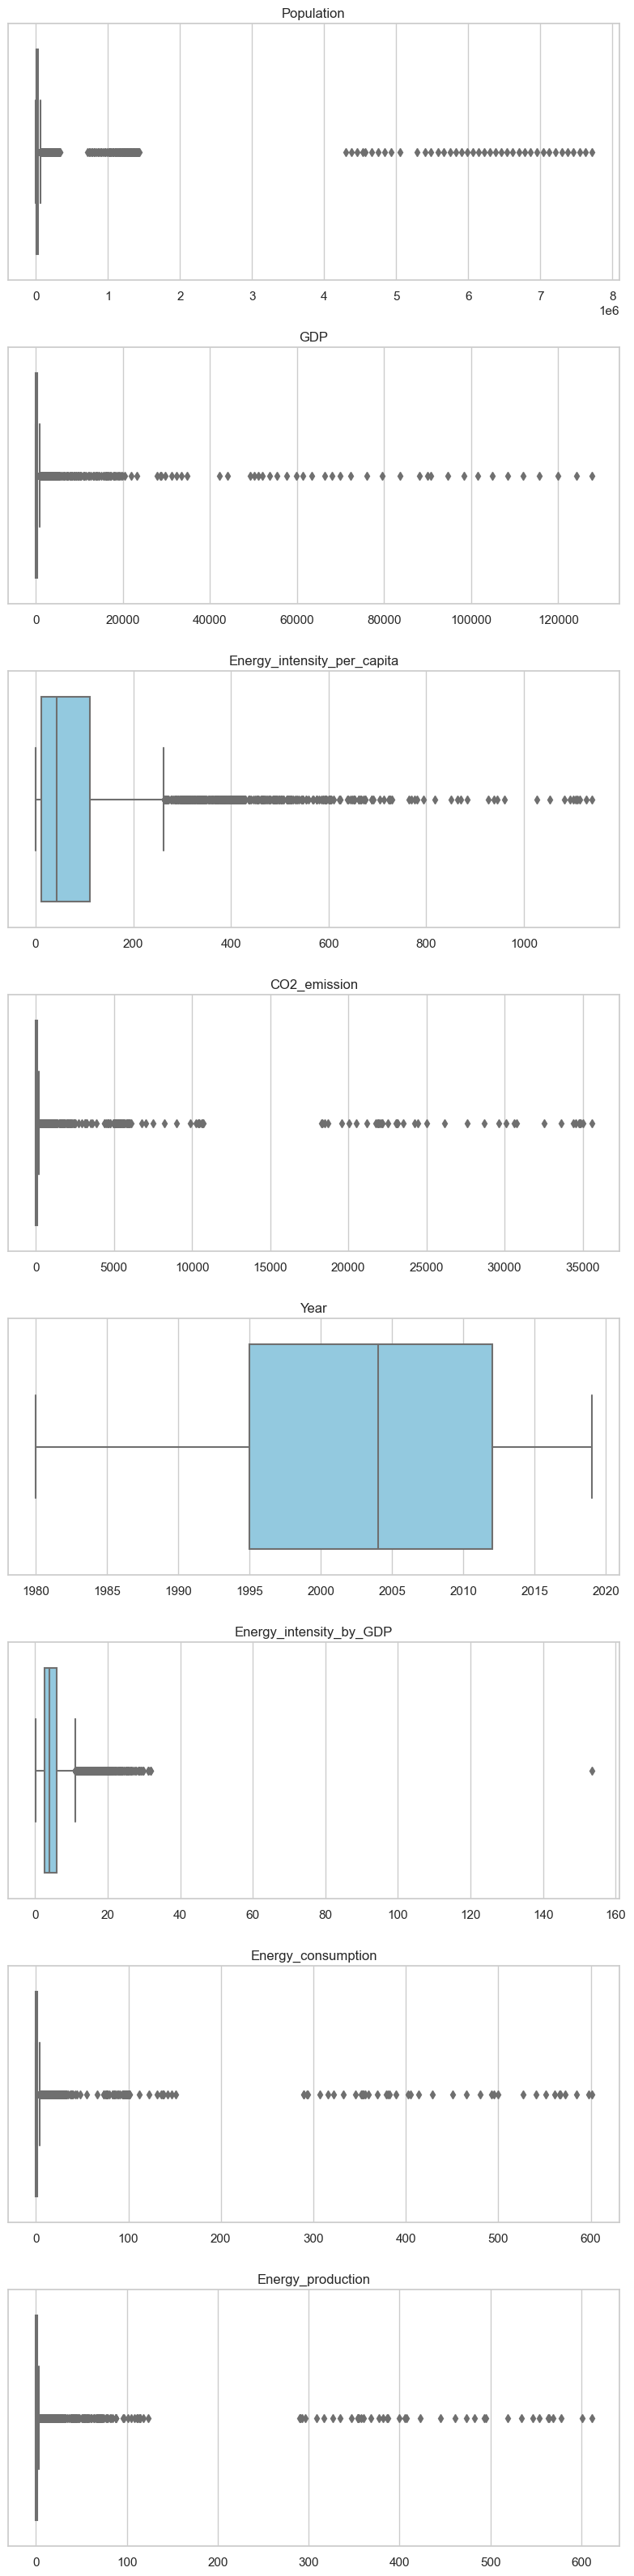

In [41]:
# Filtrar por 'Energy_type' igual a 'all_energy_types'
df_filtered = df_energy[df_energy['Energy_type'] == 'all_energy_types']

# Selecciona solo las columnas numéricas (excluyendo 'UNm¿name')
df_numerical = df_filtered.select_dtypes(include='number').drop(columns=['Unnamed: 0'])

# Elimina los valores nulos y los valores cero específicamente para algunas columnas
columns_to_filter = ['Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission']  # Agrega aquí las columnas que deseas filtrar
for column in columns_to_filter:
    df_numerical = df_numerical[df_numerical[column] != 0].dropna(subset=[column])

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja utilizando Seaborn
plt.figure(figsize=(8, 4*len(sorted_columns)))
for i, column in enumerate(sorted_columns):
    plt.subplot(len(sorted_columns), 1, i+1)  # Subtrama para cada variable
    sns.boxplot(x=df_numerical[column], color='skyblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Podemos observar que en la mayoría de variables se tienen una gran cantidad de Outliers, Esto sucede porque los países desarrollados son los que más emisiones generan, más energía consumoen y por lo general tienen más población. En este caso hablamos más de correlación que de Outliers. Esto lo podemos revisar al realizar una descripción estadística de los datos.  

In [37]:
df_numerical.describe()

,Population,GDP,Energy_intensity_per_capita,CO2_emission,Year,Energy_intensity_by_GDP,Energy_production,Energy_consumption
count,1.419500e+04,14195.000000,14195.000000,14195.000000,14195.000000,14195.000000,1.419500e+04,14195.000000
mean,1.262220e+05,1491.243115,101.285842,272.119083,2002.826277,5.461451,4.226580e+00,4.230532
std,6.645564e+05,8141.630647,128.254743,1700.159652,10.237478,4.638790,2.659917e+01,26.914046
min,2.779600e+01,0.173602,0.351858,0.000741,1980.000000,0.231285,1.859846e-18,0.000014
25%,4.829142e+03,36.120100,18.293380,3.350892,1995.000000,3.001490,1.367889e-02,0.055093
50%,1.513070e+04,165.777800,62.474121,18.078213,2003.000000,4.315201,1.523065e-01,0.300374
75%,4.659628e+04,568.080500,134.121379,76.276164,2012.000000,6.594969,1.261838e+00,1.287106
max,7.714631e+06,127690.247059,1139.320598,35584.933498,2019.000000,153.408804,6.115090e+02,601.040490


Se aprecian valores máximos lejos de las medias por las razones ya descritas.

### 6. Valores duplicados:

In [23]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_energy.duplicated())
print("Hay un total de ",duplicates_count," duplicados en df_energy")

Hay un total de  0  duplicados en df_energy


### 7. Revisón de valores en las columnas de interés:

Paises:

In [38]:
df_energy['Country'].unique()

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo-Brazzaville',
       'Congo-Kinshasa', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Côte d’Ivoire', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',

Tipo de Energía:

In [39]:
df_energy['Energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

### 8. Correlación de Variables:

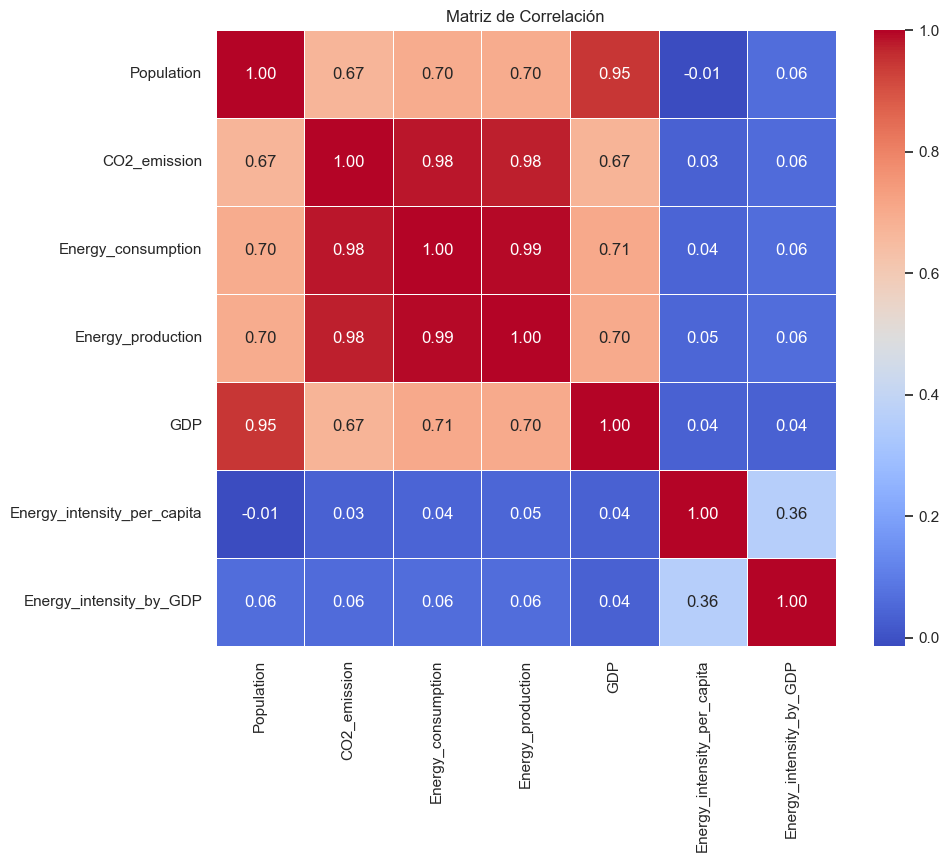

In [46]:
df_energy_g = df_energy[['Population', 'CO2_emission', 'Energy_consumption', 'Energy_production', 'GDP', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP']]

# Calcula la matriz de correlación
correlation_matrix = df_energy_g.corr()

# Configura el estilo de la visualización
sns.set(style="white")

# Crea un objeto figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Crea el mapa de calor con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)

# Ajusta el diseño
plt.title('Matriz de Correlación')
plt.show()

***Se debe tener en cuenta, la correlación alta entre Población, Consumo energético, Porducción Energética y Emisión de CO2.***